# Pre-Processing steps

<ol>1. Filling the missing value</ol>
<ol>2. Converting categories to numbers</ol>
<ol>3. Bring all the variables in range 0 to 1</ol>

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('loan_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.isnull().sum().sum()

149

In [7]:
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## 1. Filling the missing values

### Categorical Data : Mode (most frequent approach)

In [11]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

C:\Users\KUMAR SUNDRAM\AppData\Local\Temp\ipykernel_21420\2481491996.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
C:\Users\KUMAR SUNDRAM\AppData\Local\Temp\ipykernel_21420\2481491996.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [12]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

## 2. Converting categories to numbers

In [15]:
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
data['Married'] = data['Married'].map({'No':0, 'Yes':1})
data['Dependents'] = data['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
data['Education'] = data['Education'].map({'Graduate':1, 'Not Graduate':0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1, 'No':0})
data['Property_Area'] = data['Property_Area'].map({'Semiurban':1, 'Urban':2, 'Rural':0})
data['Loan_Status'] = data['Loan_Status'].map({'Y':1, 'N':0})

In [16]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


## 3. Bring all the variables in range 0 to 1

In [18]:
"""
for i in x.columns[1:]:
    data[i] = (data[i] - data[i].min())/ (data[i].max() - data[i].min())
"""

'\nfor i in x.columns[1:]:\n    data[i] = (data[i] - data[i].min())/ (data[i].max() - data[i].min())\n'

In [19]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [20]:
data['ApplicantIncome'] = (data['ApplicantIncome'] - data['ApplicantIncome'].min())/ (data['ApplicantIncome'].max() - data['ApplicantIncome'].min())
data['CoapplicantIncome'] = (data['CoapplicantIncome'] - data['CoapplicantIncome'].min())/ (data['CoapplicantIncome'].max() - data['CoapplicantIncome'].min())


In [21]:
data['LoanAmount'] = (data['LoanAmount'] - data['LoanAmount'].min())/ (data['LoanAmount'].max() - data['LoanAmount'].min())
data['Loan_Amount_Term'] = (data['Loan_Amount_Term'] - data['Loan_Amount_Term'].min())/ (data['Loan_Amount_Term'].max() - data['Loan_Amount_Term'].min())

In [22]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.781759,0.133550,0.064978,0.038910,0.197905,0.706005,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,0.075560,0.070229,0.121718,0.137668,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.033735,0.000000,0.132055,0.743590,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.045300,0.028524,0.172214,0.743590,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.069821,0.055134,0.225398,0.743590,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [62]:
# split the data into ind and dep variable
x = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [64]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,0.070489,0.000000,0.172214,0.74359,1.0,2
1,0,1,1,1,0,0.054830,0.036192,0.172214,0.74359,1.0,0
2,0,1,0,1,1,0.035250,0.000000,0.082489,0.74359,1.0,2
3,0,1,0,0,0,0.030093,0.056592,0.160637,0.74359,1.0,2
4,0,0,0,1,0,0.072356,0.000000,0.191027,0.74359,1.0,2


In [25]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [66]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,0.070489,0.000000,0.172214,0.74359,1.0,2
1,0,1,1,1,0,0.054830,0.036192,0.172214,0.74359,1.0,0
2,0,1,0,1,1,0.035250,0.000000,0.082489,0.74359,1.0,2
3,0,1,0,0,0,0.030093,0.056592,0.160637,0.74359,1.0,2
4,0,0,0,1,0,0.072356,0.000000,0.191027,0.74359,1.0,2


In [53]:
y.value_counts()/len(y)*100

Loan_Status
1    68.729642
0    31.270358
Name: count, dtype: float64

In [27]:
#data.to_csv("Loan_Prediction_data.csv")

### Creating training and validation data

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)

### Defining the architecture of the model - MultiLayer Perceptron Model/Deep Neural Network

In [58]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import InputLayer, Dense, concatenate
from keras.models import Sequential, Model
from keras import Input

In [70]:
x_train.shape

(491, 11)

In [72]:
# Number of features in the data
x_train.shape[1]

11

In [90]:
# defining input neurons
input_neurons = x_train.shape[1]

# define number of output neurons
output_neurons = 1

# defining hidden layers
number_of_hidden_layers = 2

# define neuron in each layer
neuron_hidden_layer_1_1 = 16
neuron_hidden_layer_1_2 = 8
neuron_hidden_layer_2 = 4

# Functional API

In [93]:
# Defining the architecture of the model using Functional API
x = Input(shape=(input_neurons,))
hidden1_1 = Dense(units=neuron_hidden_layer_1_1, activation='relu')(x)
hidden1_2 = Dense(units=neuron_hidden_layer_1_2, activation='relu')(hidden1_1)

combined = concatenate([hidden1_1, hidden1_2])

hidden2 = Dense(units=neuron_hidden_layer_2, activation='relu')(combined)
output = Dense(units=output_neurons, activation='sigmoid')(hidden2)

model_functional = Model(x, output)

model_functional.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 11)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 16)                │             192 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 8)                 │             136 │ dense_8[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 24)                │               0 │ dense_8[0][0],             │
│                               │                           │                 │ dense_9[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 4)                 │             100 │ concatenate_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (None, 1)                 │               5 │ dense_10[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling the model (defining loss function, optimizer, accuracy)

In [95]:
# compiling the model
# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as 'adam'
# evaluation metrics as accuracy

model_functional.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Training the model

In [97]:
model_history = model_functional.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3520 - loss: 0.7393 - val_accuracy: 0.4472 - val_loss: 0.7054
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4929 - loss: 0.7033 - val_accuracy: 0.6423 - val_loss: 0.6884
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6293 - loss: 0.6874 - val_accuracy: 0.6585 - val_loss: 0.6827
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6477 - loss: 0.6818 - val_accuracy: 0.6748 - val_loss: 0.6789
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6817 - loss: 0.6798 - val_accuracy: 0.7480 - val_loss: 0.6756
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7047 - loss: 0.6771 - val_accuracy: 0.7561 - val_loss: 0.6725
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6998 - loss: 0.6764 - val_accuracy: 0.7561 - val_loss: 0.6698
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7346 - loss: 0.6707 - val_accuracy: 0.7642 - val_loss

# Evaluating model performance on validation set

In [102]:
# getting predictions for the validation set (new dataset)
prediction = model_functional.predict(x_test)
# new_data = pd.read_csv('new_loan_dataset.csv')
prediction

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[0.1496369 ],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.64625764],
       [0.03922805],
       [0.09891146],
       [0.65279186],
       [0.08480718],
       [0.0607377 ],
       [0.55529886],
       [0.03515231],
       [0.65279186],
       [0.4203819 ],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.11820801],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.14786837],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.65279186],
       [0.652

In [108]:
prediction = prediction.reshape(123,)
prediction_int = np.where(prediction >=0.5,1,0)
prediction_int

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [110]:
y_test

150    0
559    1
598    1
235    1
145    1
      ..
363    1
280    0
7      0
289    1
373    0
Name: Loan_Status, Length: 123, dtype: int64

In [112]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [114]:
confusion_matrix(y_test, prediction_int)

array([[22, 16],
       [ 1, 84]], dtype=int64)

In [118]:
print(classification_report(y_test, prediction_int))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



In [120]:
print(accuracy_score(y_test, prediction_int))

0.8617886178861789


# Visualizing the model performance

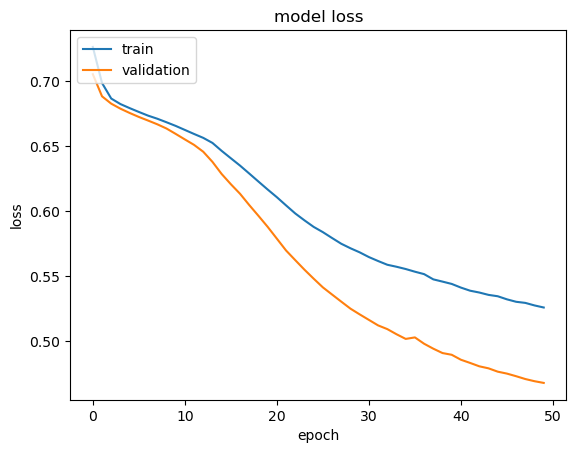

In [125]:
# summarize history for loss and accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

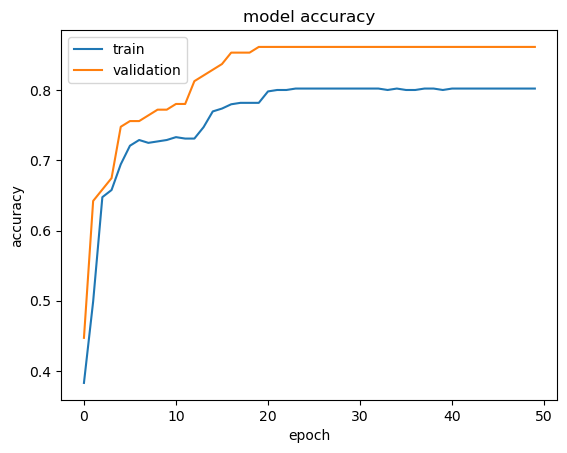

In [127]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Sequential Architecture

In [81]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=11))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

D:\software\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [99]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4112 - loss: 0.7216 - val_accuracy: 0.6016 - val_loss: 0.6906
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6056 - loss: 0.6940 - val_accuracy: 0.6748 - val_loss: 0.6737
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6598 - loss: 0.6759 - val_accuracy: 0.6911 - val_loss: 0.6624
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7051 - loss: 0.6570 - val_accuracy: 0.7073 - val_loss: 0.6506
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7048 - loss: 0.6475 - val_accuracy: 0.7073 - val_loss: 0.6369
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6875 - loss: 0.6351 - val_accuracy: 0.7073 - val_loss: 0.6236
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6486 - loss: 0.6395 - val_accuracy: 0.7073 - val_loss: 0.6136
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.6112 - val_accuracy: 0.6992 - val_los